# Problem: Wine Quality Prediction
Dataset:
    The Wine Quality dataset from the UCI Machine Learning Repository contains features related to red and white wine quality:

    Fixed Acidity
    Volatile Acidity
    Citric Acid
    Residual Sugar
    Chlorides
    Free Sulfur Dioxide
    Total Sulfur Dioxide
    Density
    pH
    Sulphates
    Alcohol
    Quality (score between 0 and 10) — Target variable
Task:
   
    Build a Decision Tree model to predict the quality of wine based on its chemical properties.



In [1]:
import pandas as pd

In [2]:
red_df = pd.read_csv(r"C:\Users\tishya\DATASETS\wine+quality\winequality-red.csv")
red_df.head()

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
1,7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
2,7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...
3,11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...
4,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5


In [3]:
white_df = pd.read_csv(r"C:\Users\tishya\DATASETS\wine+quality\winequality-white.csv")
white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,Medium
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,Medium
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,Medium
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,Medium
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,Medium


In [4]:
print('Red wine:\n')
print(red_df.info())
print('\nWhite Wine:\n')
print(white_df.info())

Red wine:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 1 columns):
 #   Column                                                                                                                                                                   Non-Null Count  Dtype 
---  ------                                                                                                                                                                   --------------  ----- 
 0   fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"  1599 non-null   object
dtypes: object(1)
memory usage: 12.6+ KB
None

White Wine:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity     

In [5]:
# spliting  the index of red_df  to create seperate columns 

def split(red_df):
    columns = []
    for i in red_df.columns:
        columns.append(i)
    columns = columns[0].split(';')

    return  columns

# Spliting rows
rows=[]
for i in range(len(red_df)):
    rows.append(red_df.iloc[i,0].split(';'))
    
# Creating new df
red_df = pd.DataFrame(rows,columns = split(red_df))

In [6]:
red_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   fixed acidity           1599 non-null   object
 1   "volatile acidity"      1599 non-null   object
 2   "citric acid"           1599 non-null   object
 3   "residual sugar"        1599 non-null   object
 4   "chlorides"             1599 non-null   object
 5   "free sulfur dioxide"   1599 non-null   object
 6   "total sulfur dioxide"  1599 non-null   object
 7   "density"               1599 non-null   object
 8   "pH"                    1599 non-null   object
 9   "sulphates"             1599 non-null   object
 10  "alcohol"               1599 non-null   object
 11  "quality"               1599 non-null   object
dtypes: object(12)
memory usage: 150.0+ KB


In [7]:
red_df.describe()

,fixed acidity,"""volatile acidity""","""citric acid""","""residual sugar""","""chlorides""","""free sulfur dioxide""","""total sulfur dioxide""","""density""","""pH""","""sulphates""","""alcohol""","""quality"""
count,1599,1599,1599,1599,1599,1599,1599,1599,1599,1599,1599,1599
unique,96,143,80,91,153,60,144,436,89,96,65,6
top,7.2,0.6,0,2,0.08,6,28,0.9972,3.3,0.6,9.5,5
freq,67,47,132,156,66,138,43,36,57,69,139,681


In [8]:
white_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
 12  wine_quality          4898 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 497.6+ KB


In [9]:
white_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [10]:
def convert_to_float(df):
    cols = df.columns
    for column in cols:
        df[column ]= pd.to_numeric(df[column])
convert_to_float(red_df)

In [11]:
# Categorising wine quality into low,high and medium

def categorize(num):
    num = float(num)
    if num>7:
        return 'High'
    elif num<8 and num>4:
        return 'medium'
    else:
        return 'low'

red_df['wine_quality'] = red_df['"quality"'].apply(categorize)

# Plotting

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

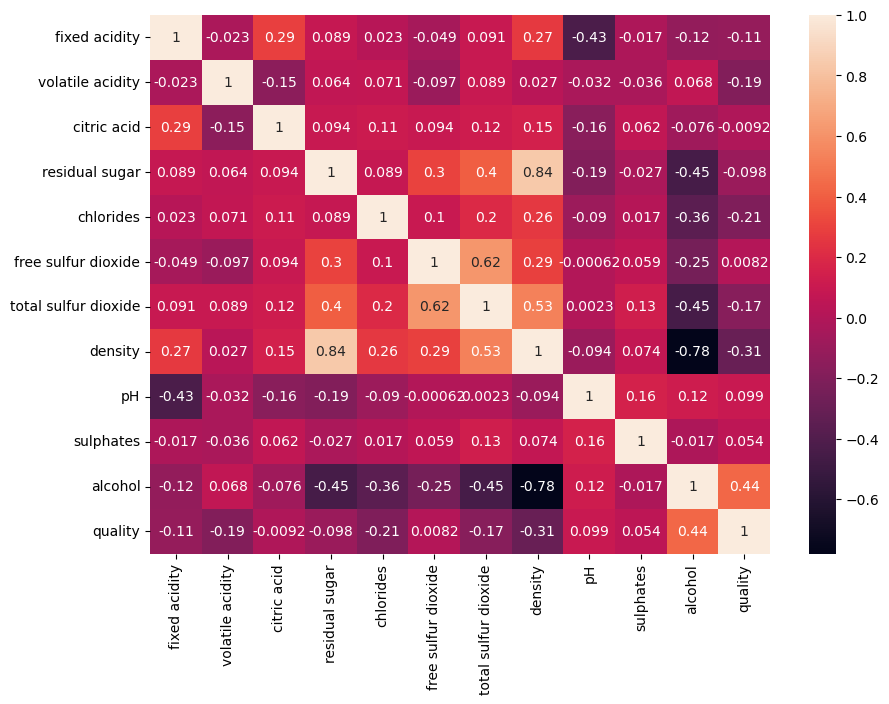

In [13]:
corr_matrix_white = white_df.drop('wine_quality',axis=1).corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr_matrix_white,annot=True)
plt.show()

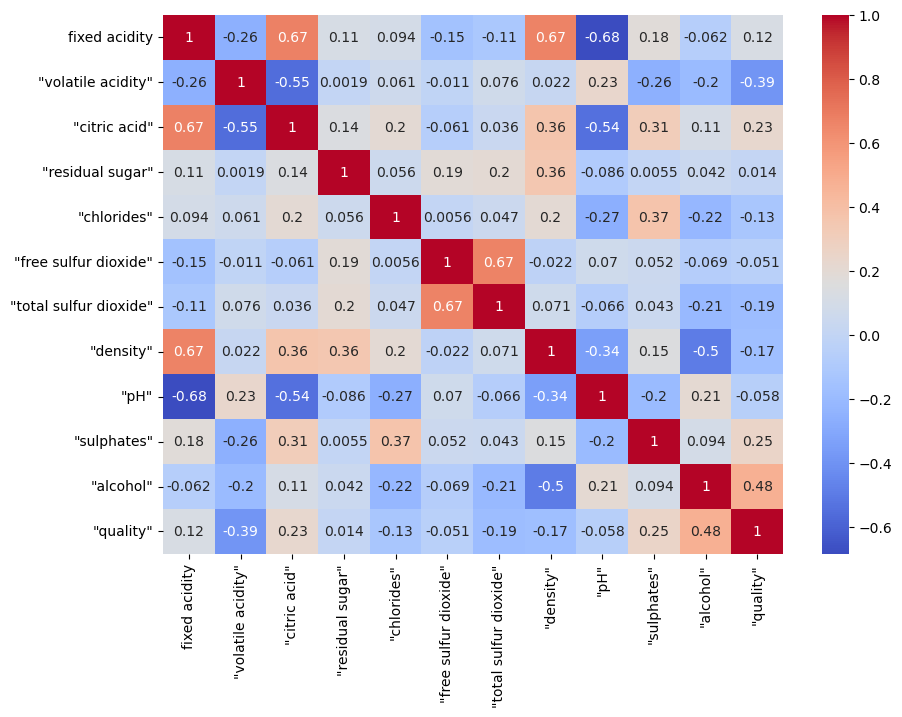

In [14]:
corr_matrix_red = red_df.drop('wine_quality',axis=1).corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr_matrix_red,annot=True,cmap='coolwarm')
plt.show()

In [15]:
# Finding high correlations
mask_r = abs(corr_matrix_red) > .5
mask_w = abs(corr_matrix_white) > .5

print('Red_wine\n')
print(corr_matrix_red[mask_r])
print('\nWhite wine\n')
print(corr_matrix_white[mask_w])

Red_wine

                        fixed acidity  "volatile acidity"  "citric acid"  \
fixed acidity                1.000000                 NaN       0.671703   
"volatile acidity"                NaN            1.000000      -0.552496   
"citric acid"                0.671703           -0.552496       1.000000   
"residual sugar"                  NaN                 NaN            NaN   
"chlorides"                       NaN                 NaN            NaN   
"free sulfur dioxide"             NaN                 NaN            NaN   
"total sulfur dioxide"            NaN                 NaN            NaN   
"density"                    0.668047                 NaN            NaN   
"pH"                        -0.682978                 NaN      -0.541904   
"sulphates"                       NaN                 NaN            NaN   
"alcohol"                         NaN                 NaN            NaN   
"quality"                         NaN                 NaN            NaN   

 

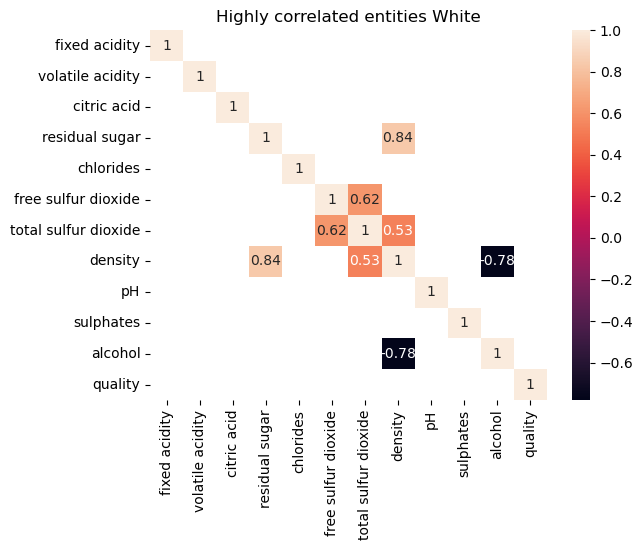

In [16]:
# Plotting highly correlated entities

sns.heatmap(corr_matrix_white[mask_w],annot=True)
plt.title('Highly correlated entities White')
plt.show()

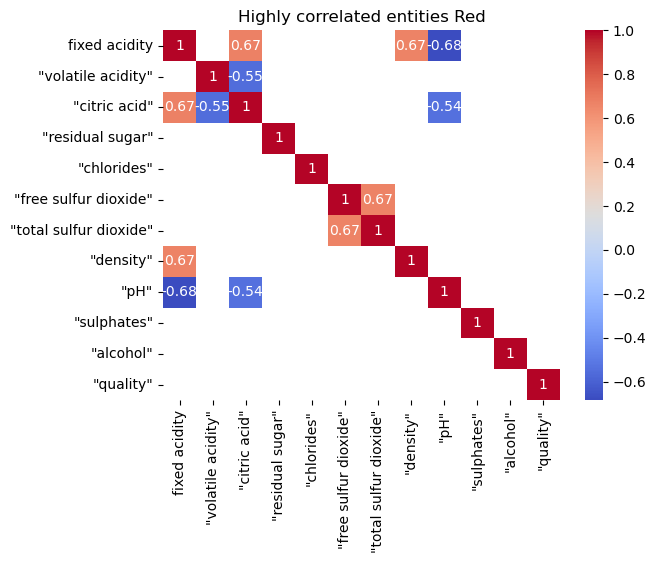

In [17]:
# Plotting highly correlated entities

sns.heatmap(corr_matrix_red[mask_r],annot=True,cmap='coolwarm')
plt.title('Highly correlated entities Red')
plt.show()

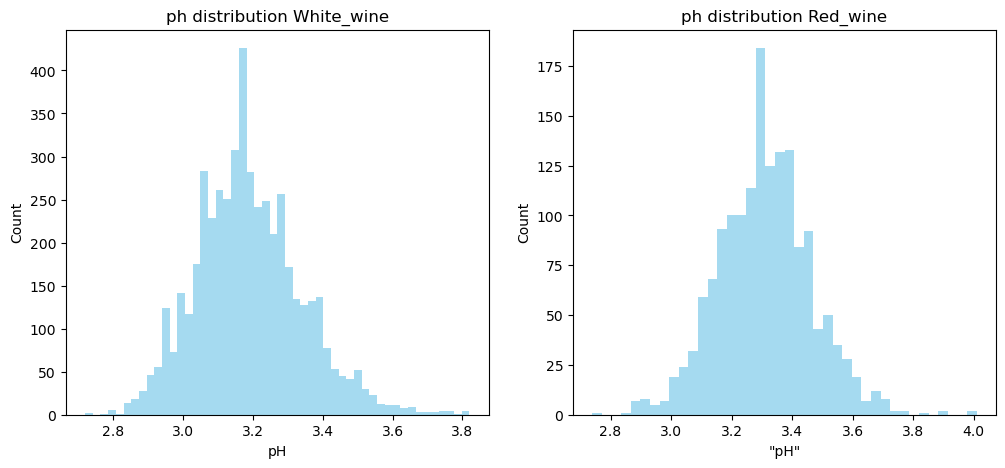

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5)) 
sns.histplot(white_df['pH'],ax=ax[0],color='skyblue',edgecolor=None)
sns.histplot(red_df['"pH"'],ax=ax[1],color='skyblue',edgecolor=None)

ax[0].set_title('ph distribution White_wine')
ax[1].set_title('ph distribution Red_wine')

plt.show()

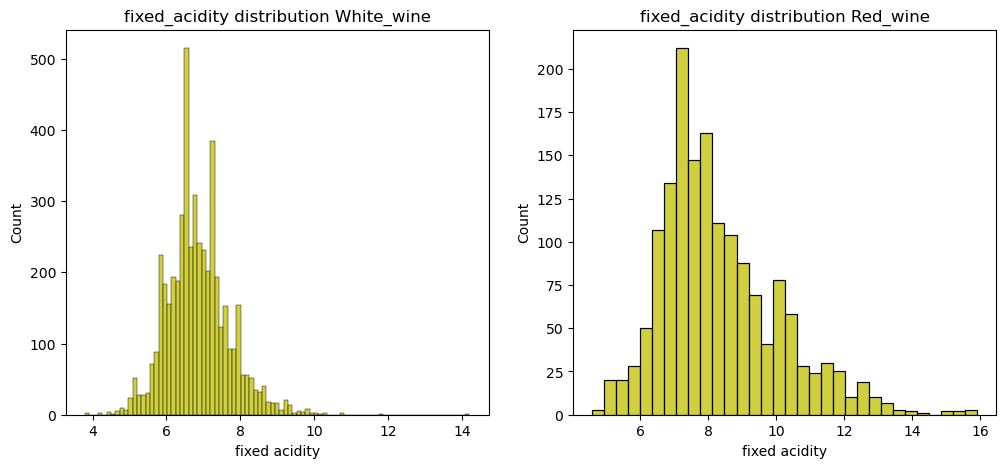

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5)) 
sns.histplot(white_df['fixed acidity'],ax=ax[0],color='y')
sns.histplot(red_df['fixed acidity'],ax=ax[1],color='y')

ax[0].set_title('fixed_acidity distribution White_wine')
ax[1].set_title('fixed_acidity distribution Red_wine')

plt.show()

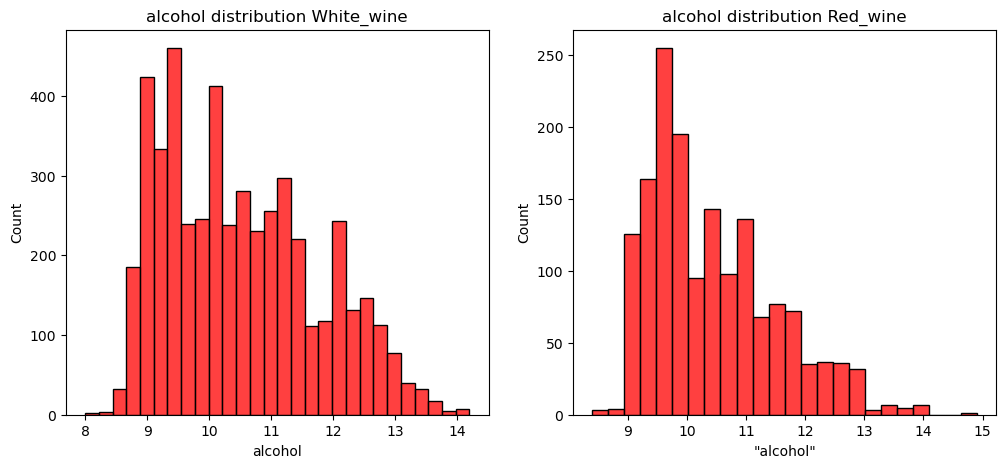

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5)) 
sns.histplot(white_df['alcohol'],ax=ax[0],color='r')
sns.histplot(red_df['"alcohol"'],ax=ax[1],color='r')

ax[0].set_title('alcohol distribution White_wine')
ax[1].set_title('alcohol distribution Red_wine')

plt.show()

General Insights:

    pH Levels: Red wines tend to have slightly higher pH levels than white wines, which could indicate less acidity.
    Fixed Acidity: Red wines exhibit more fixed acidity compared to white wines, contributing to the taste and preservation of the wine.
    Alcohol Content: Both types of wine have similar alcohol distributions, but white wine seems to show a slightly more prominent variation in the lower alcohol range.

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5)) 
sns.histplot(white_df['citric acid'],ax=ax[0],color='purple')
sns.histplot(red_df['"citric acid"'],ax=ax[1],color='purple')

ax[0].set_title('citric_acid distribution White_wine')
ax[1].set_title('citric_acid distribution Red_wine')

plt.show()

White wine has wider spectrum of citric acid

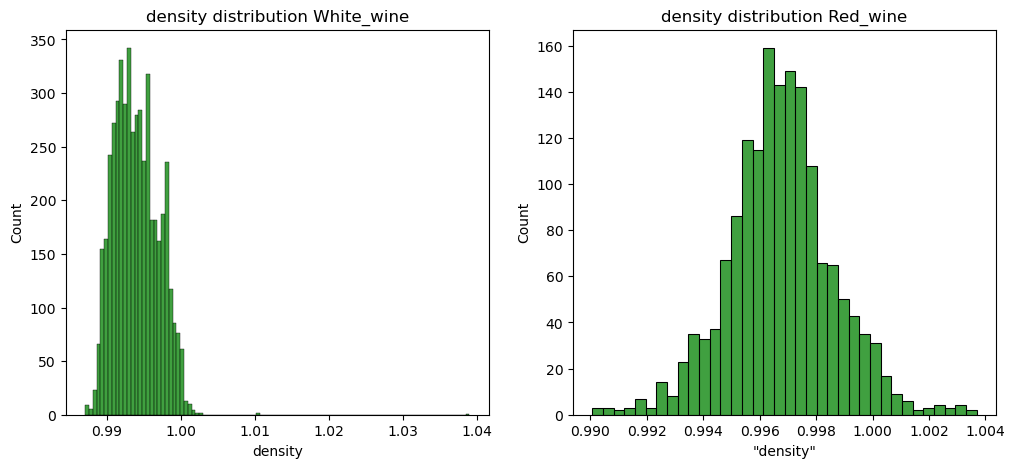

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5)) 
sns.histplot(white_df['density'],ax=ax[0],color ='g')
sns.histplot(red_df['"density"'],ax=ax[1],color='g')

ax[0].set_title('density distribution White_wine')
ax[1].set_title('density distribution Red_wine')

plt.show()

Red wine is more dense .

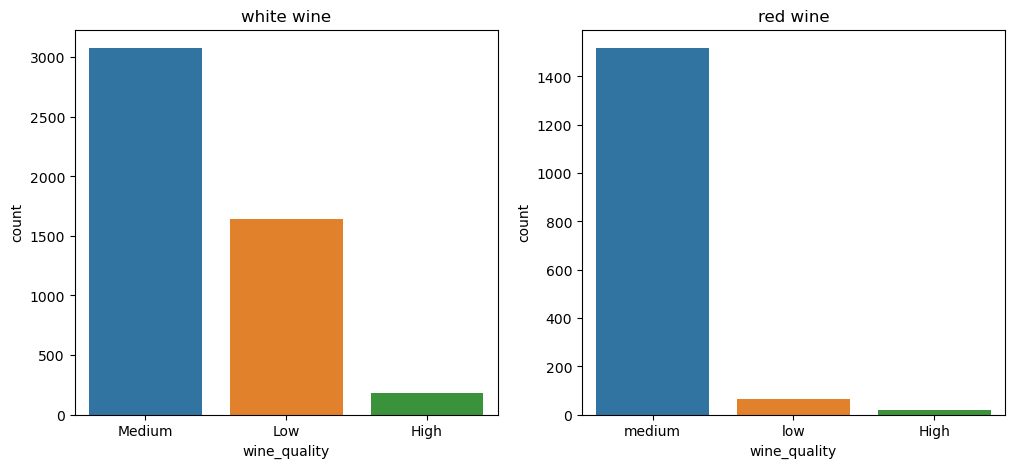

In [23]:
fig,ax = plt.subplots(1,2,figsize=(12,5))
sns.countplot(x = white_df['wine_quality'],ax=ax[0])
sns.countplot(x = red_df['wine_quality'],ax=ax[1])

ax[0].set_title('white wine')
ax[1].set_title('red wine')
plt.show()

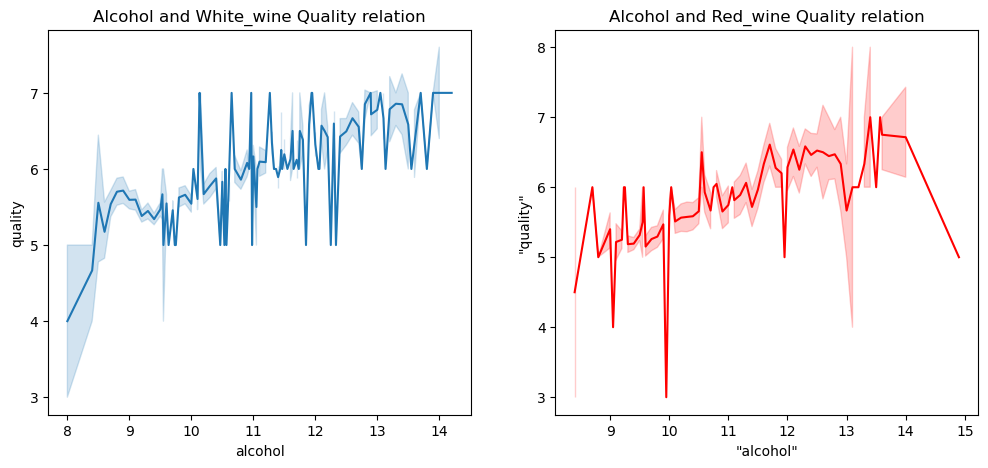

In [63]:
# Alchohol is an impotant factor to decide the quality of wine 

fig,ax = plt.subplots(1,2,figsize=(12,5))

sns.lineplot(x=white_df['alcohol'],y=white_df['quality'],ax=ax[0])
sns.lineplot(x=red_df['"alcohol"'],y=red_df['"quality"'],ax=ax[1],color='r')

ax[0].set_title('Alcohol and White_wine Quality relation')
plt.title('Alcohol and Red_wine Quality relation')

plt.show()

Higher concentration leads to high quality of wine .

    white wine ranges from 5 to 7 in terms of alchohol concentration.
    red wine ranges from 4 to 7.5 in terms of alchohol concentration.

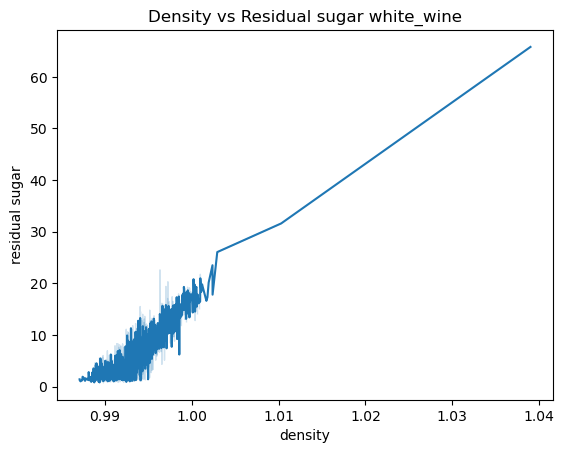

In [25]:
# Density and Residual sugar shows high correlation

sns.lineplot(white_df,x='density',y='residual sugar')
plt.title('Density vs Residual sugar white_wine')
plt.show()

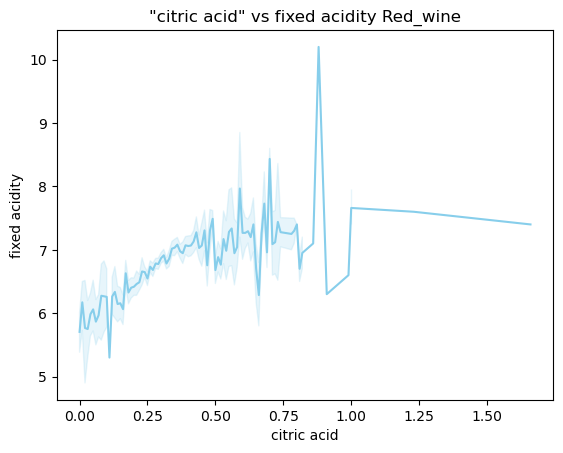

In [26]:
# "citric acid" and fixed acidity shows high correlation in red wine

white_df.columns = white_df.columns.str.replace('"', '')

sns.lineplot(white_df,x='citric acid',y='fixed acidity',color='skyblue')
plt.title('"citric acid" vs fixed acidity Red_wine')
plt.show()

In [27]:
print('Sorted Correlation of quality of white_wine with all parameters:')
abs(corr_matrix_white['quality']).nlargest(12)

Sorted Correlation of quality of white_wine with all parameters:


quality                 1.000000
alcohol                 0.435575
density                 0.307123
chlorides               0.209934
volatile acidity        0.194723
total sulfur dioxide    0.174737
fixed acidity           0.113663
pH                      0.099427
residual sugar          0.097577
sulphates               0.053678
citric acid             0.009209
free sulfur dioxide     0.008158
Name: quality, dtype: float64

In [28]:
print('Sorted Correlation of quality of red_wine with all parameters:')
abs(corr_matrix_red['"quality"']).nlargest(12)

Sorted Correlation of quality of red_wine with all parameters:


"quality"                 1.000000
"alcohol"                 0.476166
"volatile acidity"        0.390558
"sulphates"               0.251397
"citric acid"             0.226373
"total sulfur dioxide"    0.185100
"density"                 0.174919
"chlorides"               0.128907
fixed acidity             0.124052
"pH"                      0.057731
"free sulfur dioxide"     0.050656
"residual sugar"          0.013732
Name: "quality", dtype: float64

# Model

In [29]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier , plot_tree

from sklearn.metrics import accuracy_score , classification_report

In [30]:
w_en = LabelEncoder()
r_en = LabelEncoder()

In [31]:
white_df['wine_quality'] = w_en.fit_transform(white_df['wine_quality'])
red_df['wine_quality'] = r_en.fit_transform(red_df['wine_quality'])

# PRE PRUNNING

In [32]:
# dependent and independent variables of both datasets
xw = white_df[['alcohol','density']]
yw = white_df['quality']

In [33]:
wx_train,wx_test,wy_train,wy_test = train_test_split(xw,yw,test_size=.2)

In [34]:
white_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'wine_quality'],
      dtype='object')

In [35]:
# dependent and independent variables of white_wine
xw = white_df[['alcohol','density','free sulfur dioxide','pH','sulphates']]
yw = white_df['wine_quality']

In [36]:
wx_train,wx_test,wy_train,wy_test = train_test_split(xw,yw,test_size=.2)

In [37]:
tree_w = DecisionTreeClassifier()

# white_wine

In [38]:
params = param_grid = {
    'criterion': ['gini', 'entropy'],  # Measure for splitting
    'max_depth': [None, 10, 20, 30, 40, 50],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 5, 10],  # Minimum samples required to be at a leaf node
    'max_features': [None, 'auto', 'sqrt', 'log2'],  # Number of features to consider for the best split
    'class_weight': [None, 'balanced'],  # Weighting of classes
    'random_state': [42],  # For reproducibility
}

In [39]:
cv_w_grid = GridSearchCV(tree_w,params)

In [40]:
cv_w = cv_w_grid.fit(wx_train,wy_train)
cv_w

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
1440 fits failed out of a total of 5760.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1440 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\ProgramData\anaconda3\Lib\site-pac

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'max_features': [None, 'auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'random_state': [42]})

In [41]:
cv_w.best_params_

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'random_state': 42}

In [42]:
predicted_w = cv_w.predict(wx_test)
accuracy_score(wy_test,predicted_w)

0.736734693877551

In [43]:
tree = DecisionTreeClassifier(class_weight= None,
 criterion= 'gini',
 max_depth= 10,
 max_features= 'sqrt',
 min_samples_leaf= 10,
 min_samples_split= 2,
 random_state= 42)

In [44]:
tree.fit(wx_train,wy_train)

DecisionTreeClassifier(max_depth=10, max_features='sqrt', min_samples_leaf=10,
                       random_state=42)

In [45]:
tree.score(wx_test,wy_test)

0.6704081632653062

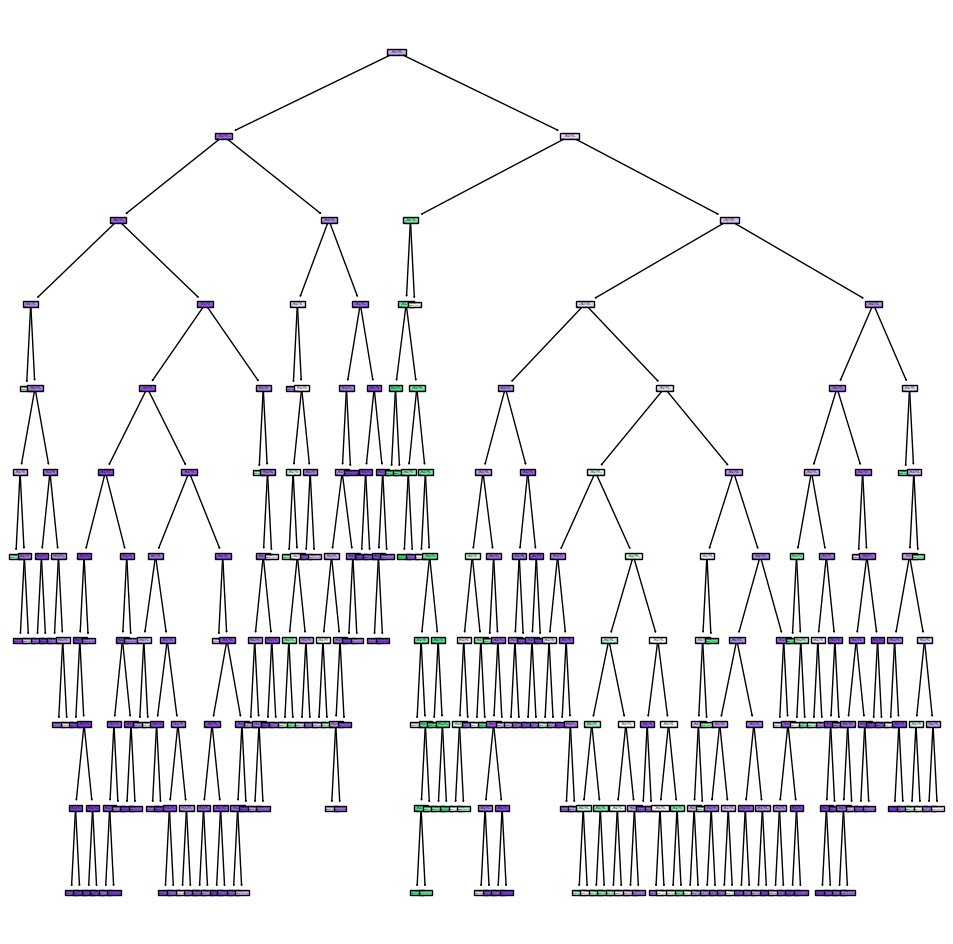

In [46]:
plt.figure(figsize=(12,12))
plot_tree(tree,filled=True)
plt.show()

COMPLEX

# red_wine

In [47]:
red_df.head()

,fixed acidity,"""volatile acidity""","""citric acid""","""residual sugar""","""chlorides""","""free sulfur dioxide""","""total sulfur dioxide""","""density""","""pH""","""sulphates""","""alcohol""","""quality""",wine_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,2
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,2


In [48]:
abs(corr_matrix_red['"quality"']).nlargest(12)

"quality"                 1.000000
"alcohol"                 0.476166
"volatile acidity"        0.390558
"sulphates"               0.251397
"citric acid"             0.226373
"total sulfur dioxide"    0.185100
"density"                 0.174919
"chlorides"               0.128907
fixed acidity             0.124052
"pH"                      0.057731
"free sulfur dioxide"     0.050656
"residual sugar"          0.013732
Name: "quality", dtype: float64

In [49]:
rx = red_df[['"alcohol"','"volatile acidity"','"sulphates"','"citric acid"']]
ry = red_df['"quality"']

In [50]:
rx_train,rx_test,ry_train,ry_test = train_test_split(rx,ry,test_size=.2)

In [51]:
tree_r = DecisionTreeClassifier()

In [52]:
params = param_grid = {
    'criterion': ['gini', 'entropy'],  # Measure for splitting
    'max_depth': [None, 10, 20, 30, 40, 50],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 5, 10],  # Minimum samples required to be at a leaf node
    'max_features': [None, 'auto', 'sqrt', 'log2'],  # Number of features to consider for the best split
    'class_weight': [None, 'balanced'],  # Weighting of classes
    'random_state': [42],  # For reproducibility
}

In [53]:
r_gridsearch = GridSearchCV(tree_r,params)

In [54]:
cv_r = r_gridsearch.fit(rx_train,ry_train)
cv_r

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
1440 fits failed out of a total of 5760.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1440 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\ProgramData\anaconda3\Lib\site-pac

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'max_features': [None, 'auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'random_state': [42]})

In [55]:
cv_r.best_params_

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': 20,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'random_state': 42}

In [56]:
cv_r.score(rx_test,ry_test)

0.6375